# KMeans(crimedata)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
crime = pd.read_csv("crime_data.csv")
crime.head(6)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7


In [3]:
crime.shape

(50, 5)

In [4]:
crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
crime.duplicated().sum()

0

In [6]:
crime1=crime.iloc[:,1:5]
crime1.head(6)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7


In [7]:
from sklearn.preprocessing import StandardScaler

In [24]:
st_scaler = StandardScaler()
crime_std = st_scaler.fit_transform(crime1)

In [23]:
crime_std = pd.DataFrame(data=crime1,columns=['Murder','Assault','UrbanPop','Rape'])
crime_std.head(6)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7


# Find optimum number of clusters

C:\Users\Varsha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


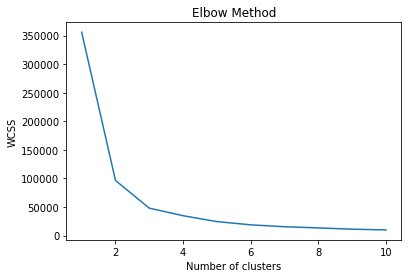

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters =i,random_state=0)
    kmeans.fit(crime_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
    


# Model Building and Model Training

In [11]:
k_model = KMeans(4, random_state=42)
k_model.fit(crime_std)

KMeans(n_clusters=4, random_state=42)

In [12]:
y_km = k_model.fit_predict(crime_std)
y_km

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 0, 2,
       3, 2, 0, 1, 1, 2, 3, 0, 2, 2, 2, 3, 1, 0, 0, 1, 0, 2, 3, 0, 0, 1,
       3, 0, 0, 3, 3, 0])

In [13]:
clust = pd.DataFrame(y_km,columns=['clusters'])
clust.head(6)

,clusters
0,2
1,2
2,2
3,0
4,2
5,0


In [14]:
crime['cluster']=clust
crime.head(6)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,0


In [15]:
crime['cluster'].value_counts()

2    16
0    14
1    10
3    10
Name: cluster, dtype: int64

In [16]:
crime[crime['cluster']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
3,Arkansas,8.8,190,50,19.5,0
5,Colorado,7.9,204,78,38.7,0
9,Georgia,17.4,211,60,25.8,0
20,Massachusetts,4.4,149,85,16.3,0
24,Missouri,9.0,178,70,28.2,0
29,New Jersey,7.4,159,89,18.8,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0
38,Rhode Island,3.4,174,87,8.3,0
41,Tennessee,13.2,188,59,26.9,0


In [17]:
crime[crime['cluster']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
6,Connecticut,3.3,110,77,11.1,1
11,Idaho,2.6,120,54,14.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
25,Montana,6.0,109,53,16.4,1
26,Nebraska,4.3,102,62,16.5,1
34,Ohio,7.3,120,75,21.4,1
37,Pennsylvania,6.3,106,72,14.9,1
43,Utah,3.2,120,80,22.9,1


In [18]:
crime[crime['cluster']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
17,Louisiana,15.4,249,66,22.2,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2


In [19]:
crime[crime['cluster']==3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
10,Hawaii,5.3,46,83,20.2,3
14,Iowa,2.2,56,57,11.3,3
18,Maine,2.1,83,51,7.8,3
22,Minnesota,2.7,72,66,14.9,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3
44,Vermont,2.2,48,32,11.2,3
47,West Virginia,5.7,81,39,9.3,3
48,Wisconsin,2.6,53,66,10.8,3


In [20]:
crime.groupby(by='cluster').agg(['mean']).reset_index()

C:\Users\Varsha\AppData\Local\Temp\ipykernel_15804\4257657369.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime.groupby(by='cluster').agg(['mean']).reset_index()


,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,8.214286,173.285714,70.642857,22.842857
1,1,5.590000,112.400000,65.600000,17.270000
2,2,11.812500,272.562500,68.312500,28.375000
3,3,2.950000,62.700000,53.900000,11.510000


C:\Users\Varsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


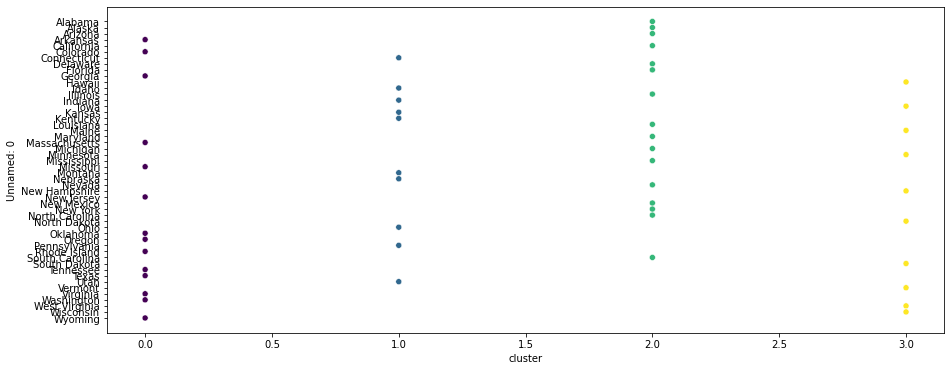

In [21]:
plt.figure(figsize=(15,6))
sns.scatterplot(crime['cluster'],crime['Unnamed: 0'],c=k_model.labels_)
plt.show()